# Aggregate probability of antibiotic prescribing stratified by predicted risk level

In [16]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from datetime import date
from operator import attrgetter
from contextlib import redirect_stdout
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## 1- Function

In [32]:
def read_process_ab_probs(infection, infection_type):
    #read csv file
    data = pd.read_csv(f'../output/hospitalisation_prediction_'+infection+'/prob_pred_bin_'+infection+'_'+infection_type+'.csv')
    #add a column of infection type 
    data['infection'] = infection+'_'+infection_type
    #add a column of deciles
    data['decile'] = data.index + 1
    #keep 3 digits in pred_mean and ab_prob_mean
    data[['pred_mean', 'ab_prob_mean']] = np.round(data[['pred_mean', 'ab_prob_mean']], decimals=3)
    #keep required columns
    data_req = data[['infection', 'bins', 'decile', 'pred_mean', 'ab_prob_mean']]

    return data_req

## 2- Read and process data
### 2-1- all

In [34]:
#read and process probs
data_lrti_incdt = read_process_ab_probs('lrti', 'incdt')
data_lrti_prevl = read_process_ab_probs('lrti', 'prevl')
data_urti_combined_incdt = read_process_ab_probs('urti_combined', 'incdt')
data_urti_combined_prevl = read_process_ab_probs('urti_combined', 'prevl')
data_uti_incdt = read_process_ab_probs('uti', 'incdt')
data_uti_prevl = read_process_ab_probs('uti', 'prevl')
data_sinusitis_incdt = read_process_ab_probs('sinusitis', 'incdt')
# data_sinusitis_prevl = read_process_ab_probs('sinusitis', 'prevl')
data_ot_externa_incdt = read_process_ab_probs('ot_externa', 'incdt')
data_ot_externa_prevl = read_process_ab_probs('ot_externa', 'prevl')
data_otmedia_incdt = read_process_ab_probs('otmedia', 'incdt')
data_otmedia_prevl = read_process_ab_probs('otmedia', 'prevl')
data_urti_incdt = read_process_ab_probs('urti', 'incdt')
data_urti_prevl = read_process_ab_probs('urti', 'prevl')
data_cough_incdt = read_process_ab_probs('cough', 'incdt')
data_cough_prevl = read_process_ab_probs('cough', 'prevl')
data_cough_cold_incdt = read_process_ab_probs('cough_cold', 'incdt')
data_cough_cold_prevl = read_process_ab_probs('cough_cold', 'prevl')
data_throat_incdt = read_process_ab_probs('throat', 'incdt')
data_throat_prevl = read_process_ab_probs('throat', 'prevl')

#append probs of all infections
data = data_lrti_incdt.append([data_lrti_prevl, data_urti_combined_incdt, data_urti_combined_prevl, data_uti_incdt, data_uti_prevl, data_sinusitis_incdt, data_otmedia_incdt, data_otmedia_prevl, data_ot_externa_incdt, data_ot_externa_prevl, data_urti_incdt, data_urti_prevl, data_cough_incdt, data_cough_prevl, data_cough_cold_incdt, data_cough_cold_prevl, data_throat_incdt, data_throat_prevl], ignore_index=True)
#save
data.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots.csv', index=False)
data

### 2-2- Pre-pandemic

In [42]:
#read and process probs
data_lrti_incdt_prepandemic = read_process_ab_probs('lrti', 'incdt_prepandemic')
data_lrti_prevl_prepandemic = read_process_ab_probs('lrti', 'prevl_prepandemic')
data_urti_combined_incdt_prepandemic = read_process_ab_probs('urti_combined', 'incdt_prepandemic')
data_urti_combined_prevl_prepandemic = read_process_ab_probs('urti_combined', 'prevl_prepandemic')
data_uti_incdt_prepandemic = read_process_ab_probs('uti', 'incdt_prepandemic')
data_uti_prevl_prepandemic = read_process_ab_probs('uti', 'prevl_prepandemic')
data_sinusitis_incdt_prepandemic = read_process_ab_probs('sinusitis', 'incdt_prepandemic')
# data_sinusitis_prevl_prepandemic = read_process_ab_probs('sinusitis', 'prevl_prepandemic')
data_ot_externa_incdt_prepandemic = read_process_ab_probs('ot_externa', 'incdt_prepandemic')
data_ot_externa_prevl_prepandemic = read_process_ab_probs('ot_externa', 'prevl_prepandemic')
data_otmedia_incdt_prepandemic = read_process_ab_probs('otmedia', 'incdt_prepandemic')
data_otmedia_prevl_prepandemic = read_process_ab_probs('otmedia', 'prevl_prepandemic')
data_urti_incdt_prepandemic = read_process_ab_probs('urti', 'incdt_prepandemic')
data_urti_prevl_prepandemic = read_process_ab_probs('urti', 'prevl_prepandemic')
data_cough_incdt_prepandemic = read_process_ab_probs('cough', 'incdt_prepandemic')
data_cough_prevl_prepandemic = read_process_ab_probs('cough', 'prevl_prepandemic')
data_cough_cold_incdt_prepandemic = read_process_ab_probs('cough_cold', 'incdt_prepandemic')
data_cough_cold_prevl_prepandemic = read_process_ab_probs('cough_cold', 'prevl_prepandemic')
data_throat_incdt_prepandemic = read_process_ab_probs('throat', 'incdt_prepandemic')
data_throat_prevl_prepandemic = read_process_ab_probs('throat', 'prevl_prepandemic')

#append probs of all infections
data_prepandemic = data_lrti_incdt_prepandemic.append([data_lrti_prevl_prepandemic, data_urti_combined_incdt_prepandemic, data_urti_combined_prevl_prepandemic, data_uti_incdt_prepandemic, data_uti_prevl_prepandemic, data_sinusitis_incdt_prepandemic, data_otmedia_incdt_prepandemic, data_otmedia_prevl_prepandemic, data_ot_externa_incdt_prepandemic, data_ot_externa_prevl_prepandemic, data_urti_incdt_prepandemic, data_urti_prevl_prepandemic, data_cough_incdt_prepandemic, data_cough_prevl_prepandemic, data_cough_cold_incdt_prepandemic, data_cough_cold_prevl_prepandemic, data_throat_incdt_prepandemic, data_throat_prevl_prepandemic], ignore_index=True)
#save
data_prepandemic.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots_prepandemic.csv', index=False)
data_prepandemic

,infection,bins,decile,pred_mean,ab_prob_mean
0,lrti_incdt_prepandemic,"(-0.000714, 0.00196]",1,0.001,0.092
1,lrti_incdt_prepandemic,"(0.00196, 0.00272]",2,0.002,0.093
2,lrti_incdt_prepandemic,"(0.00272, 0.00334]",3,0.003,0.111
3,lrti_incdt_prepandemic,"(0.00334, 0.00395]",4,0.004,0.104
4,lrti_incdt_prepandemic,"(0.00395, 0.00462]",5,0.004,0.095
5,lrti_incdt_prepandemic,"(0.00462, 0.00536]",6,0.005,0.106
6,lrti_incdt_prepandemic,"(0.00536, 0.00631]",7,0.006,0.094
7,lrti_incdt_prepandemic,"(0.00631, 0.00762]",8,0.007,0.101
8,lrti_incdt_prepandemic,"(0.00762, 0.00983]",9,0.009,0.105
9,lrti_incdt_prepandemic,"(0.00983, 0.0631]",10,0.013,0.105


### 2-3- During pandemic

In [41]:
#read and process probs
data_lrti_incdt_during_pandemic = read_process_ab_probs('lrti', 'incdt_during_pandemic')
data_lrti_prevl_during_pandemic = read_process_ab_probs('lrti', 'prevl_during_pandemic')
data_urti_combined_incdt_during_pandemic = read_process_ab_probs('urti_combined', 'incdt_during_pandemic')
data_urti_combined_prevl_during_pandemic = read_process_ab_probs('urti_combined', 'prevl_during_pandemic')
data_uti_incdt_during_pandemic = read_process_ab_probs('uti', 'incdt_during_pandemic')
data_uti_prevl_during_pandemic = read_process_ab_probs('uti', 'prevl_during_pandemic')
data_sinusitis_incdt_during_pandemic = read_process_ab_probs('sinusitis', 'incdt_during_pandemic')
# data_sinusitis_prevl_during_pandemic = read_process_ab_probs('sinusitis', 'prevl_during_pandemic')
data_ot_externa_incdt_during_pandemic = read_process_ab_probs('ot_externa', 'incdt_during_pandemic')
data_ot_externa_prevl_during_pandemic = read_process_ab_probs('ot_externa', 'prevl_during_pandemic')
data_otmedia_incdt_during_pandemic = read_process_ab_probs('otmedia', 'incdt_during_pandemic')
data_otmedia_prevl_during_pandemic = read_process_ab_probs('otmedia', 'prevl_during_pandemic')
data_urti_incdt_during_pandemic = read_process_ab_probs('urti', 'incdt_during_pandemic')
data_urti_prevl_during_pandemic = read_process_ab_probs('urti', 'prevl_during_pandemic')
data_cough_incdt_during_pandemic = read_process_ab_probs('cough', 'incdt_during_pandemic')
data_cough_prevl_during_pandemic = read_process_ab_probs('cough', 'prevl_during_pandemic')
data_cough_cold_incdt_during_pandemic = read_process_ab_probs('cough_cold', 'incdt_during_pandemic')
data_cough_cold_prevl_during_pandemic = read_process_ab_probs('cough_cold', 'prevl_during_pandemic')
data_throat_incdt_during_pandemic = read_process_ab_probs('throat', 'incdt_during_pandemic')
data_throat_prevl_during_pandemic = read_process_ab_probs('throat', 'prevl_during_pandemic')

#append probs of all infections
data_during_pandemic = data_lrti_incdt_during_pandemic.append([data_lrti_prevl_during_pandemic, data_urti_combined_incdt_during_pandemic, data_urti_combined_prevl_during_pandemic, data_uti_incdt_during_pandemic, data_uti_prevl_during_pandemic, data_sinusitis_incdt_during_pandemic, data_otmedia_incdt_during_pandemic, data_otmedia_prevl_during_pandemic, data_ot_externa_incdt_during_pandemic, data_ot_externa_prevl_during_pandemic, data_urti_incdt_during_pandemic, data_urti_prevl_during_pandemic, data_cough_incdt_during_pandemic, data_cough_prevl_during_pandemic, data_cough_cold_incdt_during_pandemic, data_cough_cold_prevl_during_pandemic, data_throat_incdt_during_pandemic, data_throat_prevl_during_pandemic], ignore_index=True)
#save
data_during_pandemic.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots_during_pandemic.csv', index=False)
data_during_pandemic

,infection,bins,decile,pred_mean,ab_prob_mean
0,lrti_incdt_during_pandemic,"(0.0002899999999999999, 0.00362]",1,0.003,0.090
1,lrti_incdt_during_pandemic,"(0.00362, 0.00469]",2,0.004,0.094
2,lrti_incdt_during_pandemic,"(0.00469, 0.0053]",3,0.005,0.101
3,lrti_incdt_during_pandemic,"(0.0053, 0.00579]",4,0.006,0.105
4,lrti_incdt_during_pandemic,"(0.00579, 0.00628]",5,0.006,0.099
5,lrti_incdt_during_pandemic,"(0.00628, 0.00679]",6,0.007,0.099
6,lrti_incdt_during_pandemic,"(0.00679, 0.00736]",7,0.007,0.095
7,lrti_incdt_during_pandemic,"(0.00736, 0.00806]",8,0.008,0.109
8,lrti_incdt_during_pandemic,"(0.00806, 0.00915]",9,0.009,0.097
9,lrti_incdt_during_pandemic,"(0.00915, 0.0186]",10,0.010,0.107


### 2-4- After 2nd lockdown

In [40]:
#read and process probs
data_lrti_incdt_post_2nd_lockdown = read_process_ab_probs('lrti', 'incdt_post_2nd_lockdown')
data_lrti_prevl_post_2nd_lockdown = read_process_ab_probs('lrti', 'prevl_post_2nd_lockdown')
data_urti_combined_incdt_post_2nd_lockdown = read_process_ab_probs('urti_combined', 'incdt_post_2nd_lockdown')
data_urti_combined_prevl_post_2nd_lockdown = read_process_ab_probs('urti_combined', 'prevl_post_2nd_lockdown')
data_uti_incdt_post_2nd_lockdown = read_process_ab_probs('uti', 'incdt_post_2nd_lockdown')
data_uti_prevl_post_2nd_lockdown = read_process_ab_probs('uti', 'prevl_post_2nd_lockdown')
data_sinusitis_incdt_post_2nd_lockdown = read_process_ab_probs('sinusitis', 'incdt_post_2nd_lockdown')
# data_sinusitis_prevl_post_2nd_lockdown = read_process_ab_probs('sinusitis', 'prevl_post_2nd_lockdown')
data_ot_externa_incdt_post_2nd_lockdown = read_process_ab_probs('ot_externa', 'incdt_post_2nd_lockdown')
data_ot_externa_prevl_post_2nd_lockdown = read_process_ab_probs('ot_externa', 'prevl_post_2nd_lockdown')
data_otmedia_incdt_post_2nd_lockdown = read_process_ab_probs('otmedia', 'incdt_post_2nd_lockdown')
data_otmedia_prevl_post_2nd_lockdown = read_process_ab_probs('otmedia', 'prevl_post_2nd_lockdown')
data_urti_incdt_post_2nd_lockdown = read_process_ab_probs('urti', 'incdt_post_2nd_lockdown')
data_urti_prevl_post_2nd_lockdown = read_process_ab_probs('urti', 'prevl_post_2nd_lockdown')
data_cough_incdt_post_2nd_lockdown = read_process_ab_probs('cough', 'incdt_post_2nd_lockdown')
data_cough_prevl_post_2nd_lockdown = read_process_ab_probs('cough', 'prevl_post_2nd_lockdown')
data_cough_cold_incdt_post_2nd_lockdown = read_process_ab_probs('cough_cold', 'incdt_post_2nd_lockdown')
data_cough_cold_prevl_post_2nd_lockdown = read_process_ab_probs('cough_cold', 'prevl_post_2nd_lockdown')
data_throat_incdt_post_2nd_lockdown = read_process_ab_probs('throat', 'incdt_post_2nd_lockdown')
data_throat_prevl_post_2nd_lockdown = read_process_ab_probs('throat', 'prevl_post_2nd_lockdown')

#append probs of all infections
data_post_2nd_lockdown = data_lrti_incdt_post_2nd_lockdown.append([data_lrti_prevl_post_2nd_lockdown, data_urti_combined_incdt_post_2nd_lockdown, data_urti_combined_prevl_post_2nd_lockdown, data_uti_incdt_post_2nd_lockdown, data_uti_prevl_post_2nd_lockdown, data_sinusitis_incdt_post_2nd_lockdown, data_otmedia_incdt_post_2nd_lockdown, data_otmedia_prevl_post_2nd_lockdown, data_ot_externa_incdt_post_2nd_lockdown, data_ot_externa_prevl_post_2nd_lockdown, data_urti_incdt_post_2nd_lockdown, data_urti_prevl_post_2nd_lockdown, data_cough_incdt_post_2nd_lockdown, data_cough_prevl_post_2nd_lockdown, data_cough_cold_incdt_post_2nd_lockdown, data_cough_cold_prevl_post_2nd_lockdown, data_throat_incdt_post_2nd_lockdown, data_throat_prevl_post_2nd_lockdown], ignore_index=True)
#save
data_post_2nd_lockdown.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots_post_2nd_lockdown.csv', index=False)
data_post_2nd_lockdown

,infection,bins,decile,pred_mean,ab_prob_mean
0,lrti_incdt_post_2nd_lockdown,"(0.0006000000000000001, 0.00416]",1,0.003,0.099
1,lrti_incdt_post_2nd_lockdown,"(0.00416, 0.00496]",2,0.005,0.095
2,lrti_incdt_post_2nd_lockdown,"(0.00496, 0.00561]",3,0.005,0.097
3,lrti_incdt_post_2nd_lockdown,"(0.00561, 0.00622]",4,0.006,0.092
4,lrti_incdt_post_2nd_lockdown,"(0.00622, 0.00683]",5,0.007,0.103
5,lrti_incdt_post_2nd_lockdown,"(0.00683, 0.00749]",6,0.007,0.098
6,lrti_incdt_post_2nd_lockdown,"(0.00749, 0.00827]",7,0.008,0.104
7,lrti_incdt_post_2nd_lockdown,"(0.00827, 0.00924]",8,0.009,0.100
8,lrti_incdt_post_2nd_lockdown,"(0.00924, 0.0108]",9,0.010,0.099
9,lrti_incdt_post_2nd_lockdown,"(0.0108, 0.0225]",10,0.013,0.102


In [18]:
data_sel_incdt = data_lrti_incdt.append([data_urti_combined_incdt, data_uti_incdt], ignore_index=True)
data_sel_prevl = data_lrti_prevl.append([data_urti_combined_prevl, data_uti_prevl], ignore_index=True)
data_sel_incdt

,bins,pred_mean,pred_sum,pred_count,ab_prob_mean,ab_prob_sum,ab_prob_count,infection,decile
0,"(0.0012499999999999998, 0.00463]",0.004,66.543215,16027,0.099,1579,16027,lrti_incdt,1
1,"(0.00463, 0.00514]",0.005,78.590743,16026,0.097,1548,16026,lrti_incdt,2
2,"(0.00514, 0.00555]",0.005,85.735270,16026,0.098,1574,16026,lrti_incdt,3
3,"(0.00555, 0.00592]",0.006,91.861550,16026,0.101,1611,16026,lrti_incdt,4
4,"(0.00592, 0.00629]",0.006,97.753929,16027,0.103,1654,16027,lrti_incdt,5
5,"(0.00629, 0.00668]",0.006,103.897958,16026,0.098,1575,16026,lrti_incdt,6
6,"(0.00668, 0.00712]",0.007,110.501638,16026,0.099,1585,16026,lrti_incdt,7
7,"(0.00712, 0.00767]",0.007,118.341818,16027,0.102,1627,16027,lrti_incdt,8
8,"(0.00767, 0.00852]",0.008,129.115201,16025,0.102,1638,16025,lrti_incdt,9
9,"(0.00852, 0.0191]",0.010,153.446377,16027,0.098,1570,16027,lrti_incdt,10


In [22]:
data_mean

,infection,bins,decile,pred_mean,ab_prob_mean
0,lrti_incdt,"(0.0012499999999999998, 0.00463]",1,0.004,0.099
1,lrti_incdt,"(0.00463, 0.00514]",2,0.005,0.097
2,lrti_incdt,"(0.00514, 0.00555]",3,0.005,0.098
3,lrti_incdt,"(0.00555, 0.00592]",4,0.006,0.101
4,lrti_incdt,"(0.00592, 0.00629]",5,0.006,0.103
5,lrti_incdt,"(0.00629, 0.00668]",6,0.006,0.098
6,lrti_incdt,"(0.00668, 0.00712]",7,0.007,0.099
7,lrti_incdt,"(0.00712, 0.00767]",8,0.007,0.102
8,lrti_incdt,"(0.00767, 0.00852]",9,0.008,0.102
9,lrti_incdt,"(0.00852, 0.0191]",10,0.010,0.098


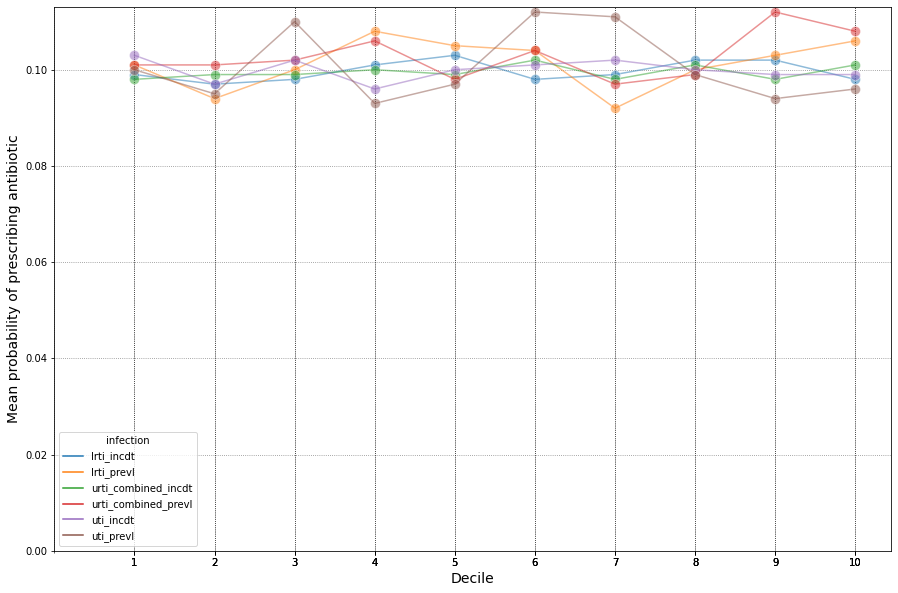

In [24]:
plt.figure(figsize=(15,10))
# sns.lineplot(x="decile", data=data_sel_incdt, y="ab_prob_mean",  hue="infection", marker='*', linestyle='--', markersize=10)
g = sns.lineplot(x='decile', y='ab_prob_mean', data=data_mean, hue='infection', marker='o', markersize=10)

plt.ylim(0)#, data.pred_mean_train.max() + data.pred_mean_train.max()/3)
plt.xlim(0)#, data.ab_prob_mean_train.max() + data.ab_prob_mean_train.max()/3)
plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Mean probability of prescribing antibiotic', fontsize=14)
plt.gca().set_xticks(np.arange(0,10,1), minor=True)
plt.grid(b=True, which='major', color='k', linestyle=':', alpha=0.5)
plt.grid(which='minor', color='k', linestyle=':', alpha=0.5)
plt.xticks(data_sel_incdt.decile)
# plt.legend([],[], frameon=False)
plt.savefig('../output/aggregate_ab_prob/aggregate_ab_prob_incdt.jpg')
plt.show()

In [19]:
data_sel_incdt

,bins,pred_mean,pred_sum,pred_count,ab_prob_mean,ab_prob_sum,ab_prob_count,infection,decile
0,"(0.0012499999999999998, 0.00463]",0.004,66.543215,16027,0.099,1579,16027,lrti_incdt,1
1,"(0.00463, 0.00514]",0.005,78.590743,16026,0.097,1548,16026,lrti_incdt,2
2,"(0.00514, 0.00555]",0.005,85.735270,16026,0.098,1574,16026,lrti_incdt,3
3,"(0.00555, 0.00592]",0.006,91.861550,16026,0.101,1611,16026,lrti_incdt,4
4,"(0.00592, 0.00629]",0.006,97.753929,16027,0.103,1654,16027,lrti_incdt,5
5,"(0.00629, 0.00668]",0.006,103.897958,16026,0.098,1575,16026,lrti_incdt,6
6,"(0.00668, 0.00712]",0.007,110.501638,16026,0.099,1585,16026,lrti_incdt,7
7,"(0.00712, 0.00767]",0.007,118.341818,16027,0.102,1627,16027,lrti_incdt,8
8,"(0.00767, 0.00852]",0.008,129.115201,16025,0.102,1638,16025,lrti_incdt,9
9,"(0.00852, 0.0191]",0.010,153.446377,16027,0.098,1570,16027,lrti_incdt,10


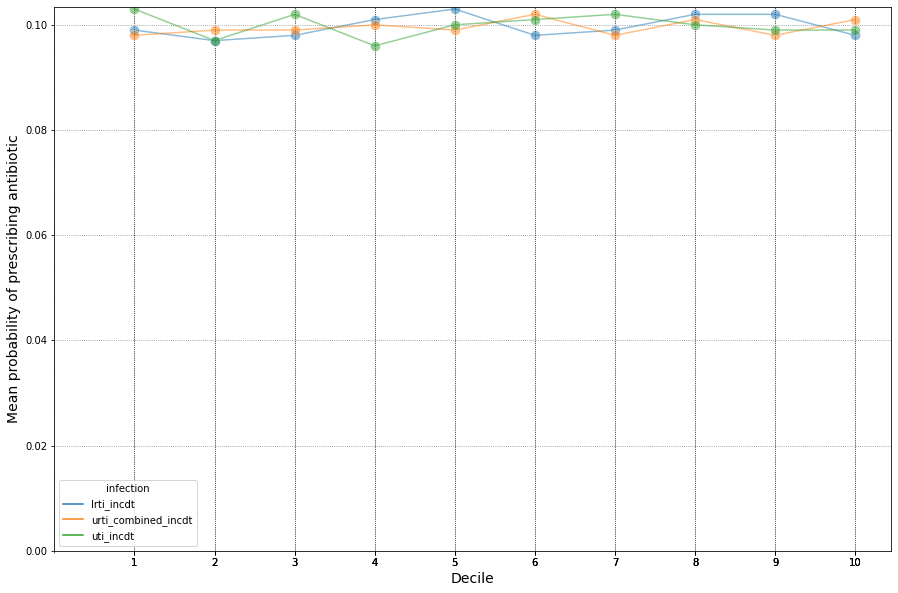

In [20]:
plt.figure(figsize=(15,10))
g = sns.lineplot(x='decile', y='ab_prob_mean', data=data_sel_incdt, hue='infection', marker='o', markersize=10)
# g = sns.lineplot(x="decile", data=data_sel_incdt, y="ab_prob_mean_test",  hue="infection", marker='*', linestyle='--', markersize=10)

plt.ylim(0)#, data.pred_mean_train.max() + data.pred_mean_train.max()/3)
plt.xlim(0)#, data.ab_prob_mean_train.max() + data.ab_prob_mean_train.max()/3)
plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Mean probability of prescribing antibiotic', fontsize=14)
plt.gca().set_xticks(np.arange(0,10,1), minor=True)
plt.grid(b=True, which='major', color='k', linestyle=':', alpha=0.5)
plt.grid(which='minor', color='k', linestyle=':', alpha=0.5)
plt.xticks(data_sel_incdt.decile)
# plt.legend([],[], frameon=False)
plt.savefig('../output/aggregate_ab_prob/aggregate_ab_prob_incdt.jpg')
plt.show()

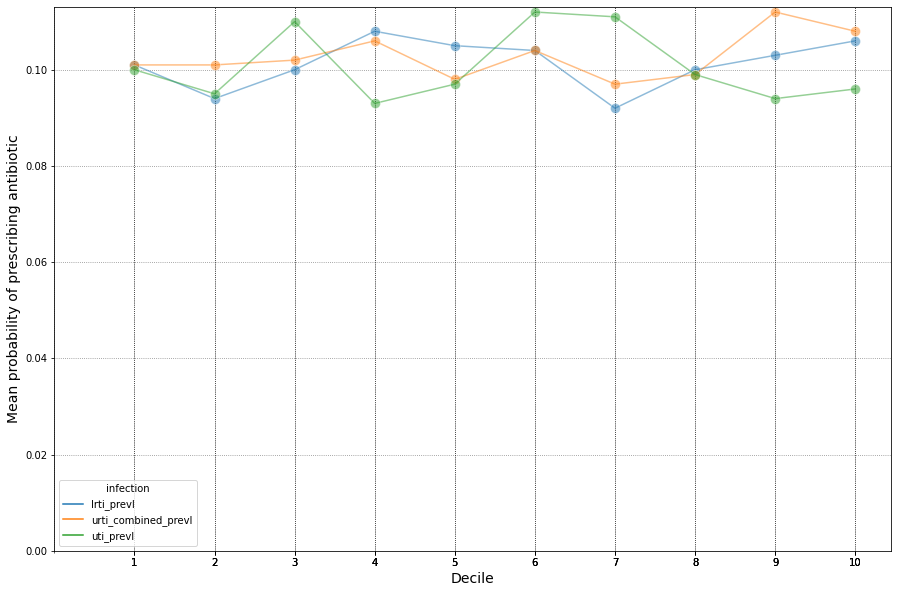

In [21]:
plt.figure(figsize=(15,10))
g = sns.lineplot(x='decile', y='ab_prob_mean', data=data_sel_prevl, hue='infection', marker='o', markersize=10)
# g = sns.lineplot(x="decile", data=data_sel_prevl, y="ab_prob_mean",  hue="infection", marker='*', linestyle='--', markersize=10)

plt.ylim(0)
plt.xlim(0)
plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Mean probability of prescribing antibiotic', fontsize=14)
plt.gca().set_xticks(np.arange(0,10,1), minor=True)
plt.grid(b=True, which='major', color='k', linestyle=':', alpha=0.5)
plt.grid(which='minor', color='k', linestyle=':', alpha=0.5)
plt.xticks(data_sel_prevl.decile)
# plt.legend([],[], frameon=False)
plt.savefig('../output/aggregate_ab_prob/aggregate_ab_prob_prevl.jpg')
plt.show()